*Classification* problems are a form of *supervised learning* where we train a model using data where the outcome is known and then apply the model to data where the outcome is not known. Most common classification is to predict whether the outcome is going to be 1 or 0 (buy/don't buy, click/don't click).

Often times, we need more than binary classification. In which case, most algorithms can return probability scores in which class an outcome is predicted to belong (propensity).

Sklearn's logistic regression provides two prediction methods: `predict` (returns less class), and `predict_proba` (returns probabilities of each class). A sliding cutoff is then applied on the propensity score to convert to a decision. General approach as follows:

<ol>
<li>Establish a cutoff probability for the class of interest, above which we consider a record as belonging to that class.</li>
<li>Estimate (with any model) the probability that a record belongs to the class of interest.</li>
<li>If that probability is above the cutoff probability, assign the new record to the class of interest.</li>
</ol>

### __Naive Bayes__

The naive Bayes algorithm uses the probability of observing predictor values, given a previous outcome.

__*Conditional probability*__ <br>
The probability of observing some even (e.g. *X = i*) given some other event (e.g. *Y = i*): $P(X_i|Y_i)$

__*Posterior probability*__ <br>
The probability of an outcome after the predictor information has been incorporated (in contrast to the *prior probability* of outcomes, not taking predictor information into account).

Consider the exact Bayesian classification:
<ol>
<li>Find all the other records with the same predictor profile (i.e. predictor values are the same).
<li>Determine what classes those records belong to, and which is the most prevalent class (i.e. probable)
<li>Assign that class to the new record
</ol>

This approach requires finding all the previous records that match exactly with the new record. This is impractical if, say, we have to match a new customer to a previous record of customers with identical variables in order to classify the new customer.

The naive Bayes does not required to find exact match in the previous records to classify a new record. Instead, use the entire data set:

1. For binary response, estimate the individual conditional probabilities for each predictor $P(X_j|Y=i)$.
2. Multiply these probabilities by each other, and then by the proportion of records belonging to *Y = i*.
3. Repeat steps 1 and 2 for all classes.
4. Estimate a proability for outcume *i* by taking the value calculated in step 2 for class *i* and dividing it by the sum of such values for all classes.
5. Assign the record to the class with the highest probability for this set of predictor values. 

The above procedure can be expressed as following:

$$P(Y=i|X_1,...,X_p)=\frac{P(Y=i)P(X_1|Y=i)...P(X_p|Y=i)}{P(Y=0)P(X_1|Y=0)...P(X_p|Y=0)+P(Y=1)P(X_1|Y=1)P(X_p|Y=1)}$$

The procedure above is called naive because we assume that the predictor $X_j$ is *independent* of all the other predictor variables.


The Bayesian classifier works only with categorical predictors. To apply naive Bayes to numerical predictors, one of two approaches must be taken:
* Bin and convert the numberical predictors to categorical predictors and apply the algorithm of the previous section.
* Use a probability model (e.g. the normal distribution) to estimate the conditional probability.

### __Discriminant Analysis__

*Discriminant analysis* is the earliest classifier. Most commonly used is *lineaer discriminant analysis* (LDA). Though LDA is less widely utilized nowadays. Python implementation of LDA uses `LinearDiscriminantAnalysis` class from the `sklearn.discriminant_analysis` package. `scalings_` property then provides the estimated wrights.

__*Covariance*__ <br>
A measure of the extent to which one variable varies in concert with another (i.e. similar magniture and direction).

__*Discriminant function*__ <br>
The function that, when applied to the predictor variables, maximizes the separation of the classes.

__*Discriminant weights*__ <br>
The scores that result from the application of the discriminant function and are used to estimate probabilities of belonging to one class or another.

> If the predictor variables are normalized prior to running the LDA, the discriminator weights are measures of variable importance. Thus, providing a computationally efficient method of feature selection.


### __Logistic Regression__

Logistic regression is similar to multiple linear regression, but the outcome is binary. Transformations are employed to convert the problem to one that a linear model can be fit. The approach is of a structured model rather than data-centric, like KNN and naive Bayes. Logistic regression is popular because its fast computational speed and the model produces fast scoring of new data.

__*Logit*__ <br>
The function that maps class membership probability to a range from $\pm \infty$ (instead of 0 to 1). *Synonym* Log odds

__*Odds*__ <br>
The ratio of "success (1) to "not success" (0)

__*Log odds*__ <br>
The response in the transformed model (now linear), which gets mapped back to a probability.

Important component of the logistic response is the *logistic response function* and the *logit* where we map a probability (0 - 1 scale) to a more expansive scale suitable for linear modeling.
We apply the logistic response to the predictors to ensure the outcome variable falls between 0 and 1 as probability should:

$\Large p = \frac{1}{1+e^{\normalsize -(\beta_0+\beta_1x_1+...+\beta_qx_q)}}$

This transform ensures that the p stays between 0 and 1.

To be able to express the expnential expression out of the denominator, consider the *odds* instead of probabilities. Odds being the ratio between "successes" (1) and "non-successes" (0). Say the probability winning is 0.5, so the probability of not winning is 1 - 0.5 = 0.5. The odds is 1, since 0.5 / 0.5 = 1:

$Odds(Y=1) = \large \frac{p}{1-p}$

We can get the probability from the odds using the inverse odds function:

$p=\large \frac{Odds}{1+Odds}$

So, then we express the expnential term as odds:

$Odds(Y=1)=e^{\normalsize \beta_0+\beta_1x_1+...+\beta_qx_q}$

$log(Odds(Y=1))=\beta_0+\beta_1x_1+...+\beta_qx_q$

The log-odds function, logit, maps the probability p from (0,1) to any value

<p align=center>
<img src="Logit function.JPG" alt="Logit function" width=300>
<p>

The logistic regression really is a special case of *generalized linear model* (GLM)is accomodated in Python using  the `logisticRegression` class from the `sklearn` package.

GLM comprises of: 

* a probability distribution of family (binomial for logistic regression),
* a link function (transform function that maps the response to the predictors - logit function for logistic regression).

Logistic regression is the most common form of GLM. Other GLM is the use of Poisson distribution (for count data; e.g. number of clicks on a website), negative binomial and gamma (model elapsed time; e.g. time to failure).

Since the predicted value is really in terms of the log odds:

$\small \hat{Y}=log(Odds(Y=1))$

The predicted probability is then given by the logistic response function:

$\hat{p} = \frac{\normalsize 1}{\normalsize 1+e^{\small -\hat{Y}}}$

We cannot use RMSE and R-squared to evaluate the fit of logistic model like we do in linear regresion. In logistic regression, there is no closed-form solution, and the model must be fit using *maximum likelihood estimation (MLE)*. MLE is a process that tires to find the model that is most likely to have produced the data we see. The response of the logistic regression is not 0 or 1, but an estimate of the log odds that the response is 1. 

Along with the estimated coefficients, standard error of the coefficients (SE), z-value, and a p-value. Python's `statsmodels` has an implementation for GLM that provides detailed information to asses the model.

Similarly in regression, the interpretation of the p-value should be viewed more as a relative indicator of variable importance than as a formal measure of statistical significance

> Factor variables need to be coded, justl ike in linear regression. In Python's `sklearn`, it is easiest to use one hot encoding - only n - 1 of the resulting dummies can be used in the regression.

### __Evaluating Classification Models__

__*Accuracy*__ <br>
The precent (or proportion) of cases classified correctly.

__*Confusion matrix*__ <br>
A tabular display (2X2 in the binary case) of the record counts by their predicted and actual classification status.

__*Sensitivity*__ <br>
The percent (or proportion) of all 1s that are correctly classified as 1s. *Synonym:* Recall

__*Specificity*__ <br>
The percent (or proportion) of all 0s that are correctly classified as 0s.

__*Precision*__ <br>
The percent (proportion) of predicted 1s that are actually 1s.

__*ROC curve*__ <br>
A plot of sensitivity versus specificity.

__*Lift*__ <br>
A measure of how effective the model is at identifying (comparatively rare) 1s at different probability cutoffs.

Simple way to measure classification performance is to count the propotion of predictions that are correct (measure the *accuracy*).

$accuracy =\frac{\sum{TruePositives}+\sum{TrueNegatives}}{SampleSize}$

The main metric for classification is the *confusion matrix*. It shows the number of correct and incorrect predictions categorized by type of response. Packages in python provide ways to compute confusion matrix, but you can easily do it manually in Python for binary case:

```Python
pred = logit_reg.predict(X)
pred_y = logit_reg.predict(X) == 'default'
true_y = y == 'default'
true_pos = true_y & ~pred_y
true_neg = ~true_y & ~pred_y
false_pos = ~true_y & pred_y
false_neg = true_y & ~pred_y
confusion_mat = pd.DataFrame(
    [[np.sum(true_pos), np.sum(false_neg)],
    [np.sum(false_pos), np.sum(true_neg)]], 
    index=["Y = default", "Y = paid off"], comuns=["Yhat = default","Yhat = paid off"])
```

<p align=center>
<img src="Confusion matrix.jpg" alt="Confusion matrix" width=300>
</p>

There is a trade off between recall and specificity. By capturing more 1s means more 0s were captured as 1s. The metric that captures this trade-off is the *Receiver Operating Characteristics*  (ROC curve). The ROC curve plots recall on the y-axis vs. specificity on the x-axis. The ROC curve depicts the trade-off between recall and specificity as you change the cut-off to determine how to classify a record.

The procedure to plot the ROC curve:

1. Sort the records by the predicted probability of being a 1, starting with the most probable to  the least.

2. Compute the cumulatie specificity and recall based on the sorted records.

In Python, we use `.roc_curve()` method from the `sklearn.metrics` package to calculate the necessary information for the ROC curve.

The dotted line is a classifier no better than random chance. In truly good classifier will have an ROC that hugs the upper left corner - it will correctly identify lots of 1s without misclassifying lots of 0s and 1s

<p align=center>
<img src="ROC curve.jpg" alt="ROC curve" width=300>
</p>

ROC by itself doesn't constitute a single measure for the performance of a classifier, though it provides a good graphical depiction from which we can measure the area under the curve (AUC) metric. it follows then that the larger the value of AUC, the more effective the classifier. AUC of 1 (e.g. area of a 1 by 1 square) would mean the perfect classifier with all predicted 1s being true positives. A completely ineffective classifier would be half of that area, AUC = 0.5 (since the diagonal devides the square in half).

We can use `.roc_auc_score()` method from the `sklearn.metrics` package; with the expected values as 0 or 1. 

### __Strategies for Imbalanced Data__

The above metrics are suitable for evaluation of classification models with imbalanced data - data where the outcome of interest is rare. Here we look at strategies to improve predictive modeling performance with imbalanced data.

__*Undersample*__ <br>
Use fewer of the prevalent class records in the classification model. *Synonym:* Downsample

__*Oversample*__ <br>
Use more of the rare class records in the classification model, bootstrapping if necessary. *Synonym:* Upsample

__*Up weight or down weight*__ <br>
Attach more (or less) weight to the rare (or prevalent) class in the model.

__*Data generation*__ <br>
Like bootstrapping, except that each new bootstrapped record is slightly different from its source.

__*z-score*__ <br>
The value that results after standrdization.

__*K*__ <br>
The number of neighbors considered in the nearest neighbour calculation.


If you have enough data you can downsample the prevalent class, so that the data to be modeled is more balanced between 0s and 1s. Question is how much data is considered enough? Generally, having tens of thousands of records for the less dominant class is enough.

On the other hand if you have small data set, downsampling runs the risk of throwing out useful information. In this case, you can upsampling the rarer class by drawing additional rows with replacement (bootstrapping). Or you can gain the same effect by weighting the data. In Python's `fit` method of the `LogisticRegresstion` instance, the `sample_weight` argument is used:

```Python
weightt = [default_wt if outcome == 'default' else 1
for outcome in full_train_set.outcome]
model = LogisticRegression()
model.fit(X, y, sample_weight=weight)
```

A variation to upsampling by bootstrapping is *data generation*. This is done by perturbing existing records to create new records. Since the algorithm doesn't have a large set of information to build classification "rules", we can give it a chance to learn a more robust set of rules by creating new records that are similar but not identical to existing records.

The Python package `imbalanced-learn` implements various methods with an API that is compatible with `sklearn`. It provides various methods for over and under sampling

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [181]:
raw = pd.read_csv("Invistico_Airline.csv")
raw.info() # The dataframe seems to have 129,880 rows with 23 columns, some arrival delay data are missing
raw.duplicated().sum() # No duplicated entry
raw.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

satisfaction                            2
Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      5398
Seat comfort                            6
Departure/Arrival time convenient       6
Food and drink                          6
Gate location                           6
Inflight wifi service                   6
Inflight entertainment                  6
Online support                          6
Ease of Online booking                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Cleanliness                             6
Online boarding                         6
Departure Delay in Minutes            466
Arrival Delay in Minutes              472
dtype: int64

In [182]:
raw.head(5)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [183]:
categorical = list(raw.select_dtypes(include="object").columns) # Categorical columns
categorical.remove("satisfaction")
categorical # There doesn't seem to be any typoed values in the categorical columns, based on the count of the .nunique() above

['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [184]:
numerical = raw.select_dtypes(include=["float","int"]).columns
numerical

Index(['Age', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

<AxesSubplot:>

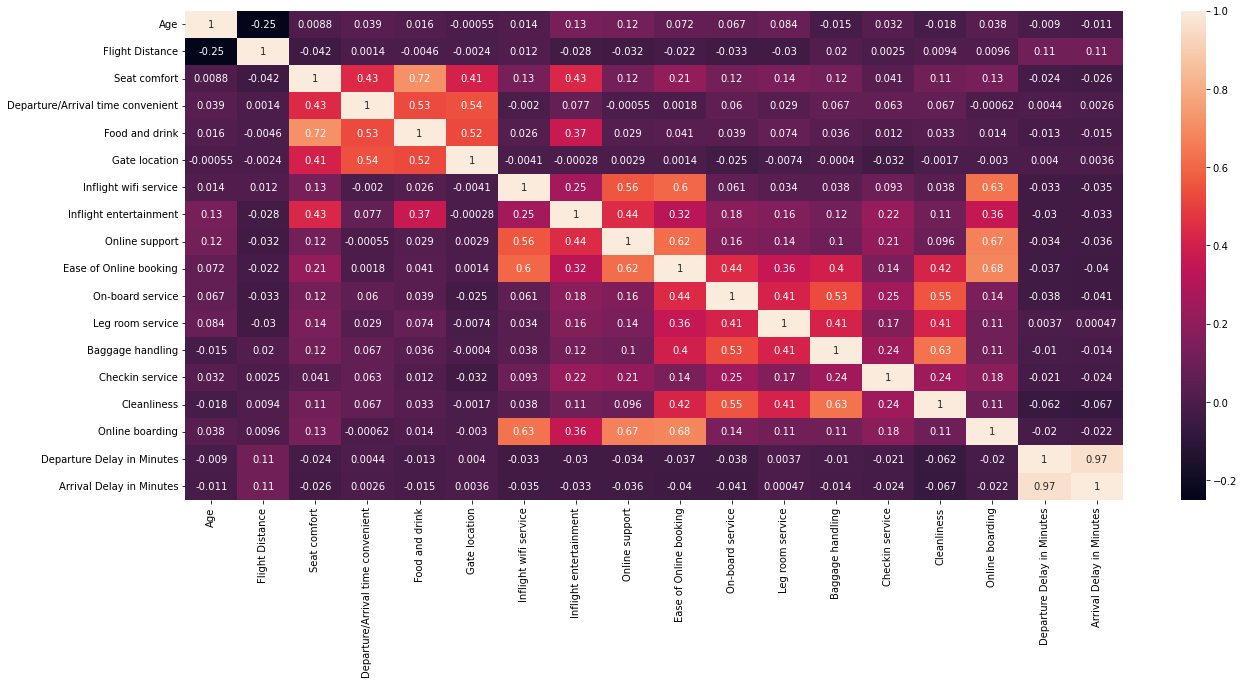

In [185]:
plt.figure(figsize=(21,9))
sns.heatmap(data=raw.corr(), annot=True) # Delay and departure delays are very closely correlated should drop one of them

<function matplotlib.pyplot.show(close=None, block=None)>

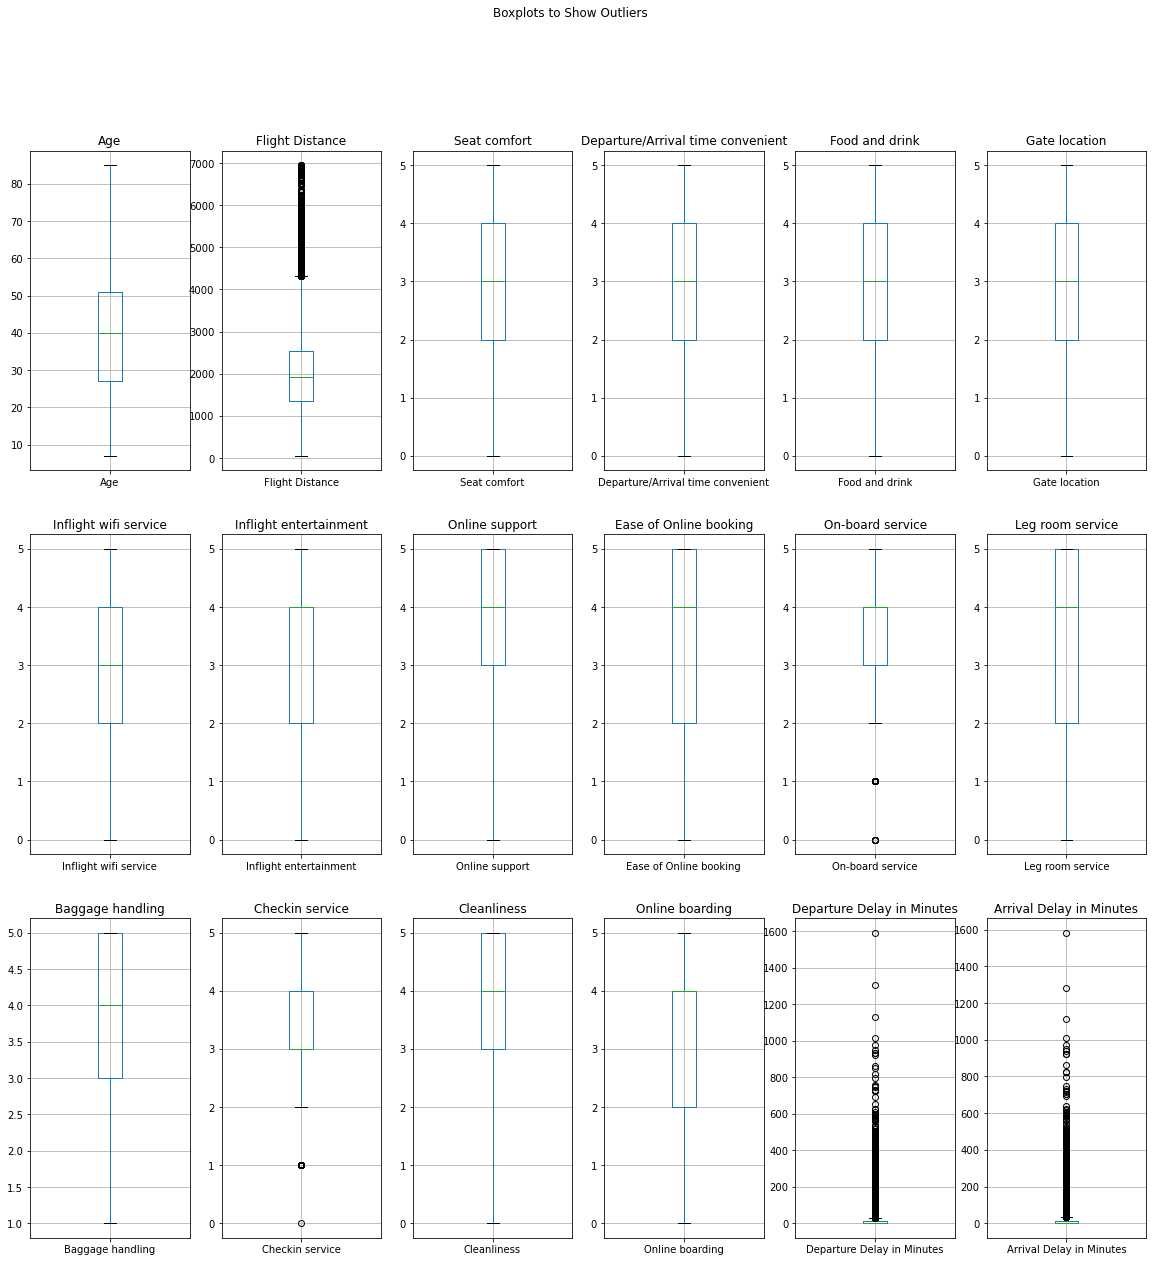

In [186]:
# Let's see some outliers
plt.figure(figsize=(20,20))
i=0
for col in numerical:
    i+=1
    plt.subplot(3, 6, i)
    raw.boxplot(column=col)
    plt.title(col)

plt.suptitle("Boxplots to Show Outliers")
plt.show


In [187]:
data = pd.get_dummies(raw, columns=categorical, ) # Convert categorical data into binary (1s and 0s)

In [188]:
data.columns

Index(['satisfaction', 'Age', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Female', 'Gender_Male', 'Customer Type_Loyal Customer',
       'Customer Type_disloyal Customer', 'Type of Travel_Business travel',
       'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus'],
      dtype='object')

In [189]:
# Predictors and response
X = data.drop(columns=["Arrival Delay in Minutes", "satisfaction"])
y = data["satisfaction"]

In [190]:
# Split train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [191]:
# Train the model
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver="liblinear")
logit_reg.fit(X_train, y_train)

LogisticRegression(C=1e+42, solver='liblinear')

In [192]:
# Predicted classes based on the sampled test 
y_pred = logit_reg.predict(X_test)
pd.DataFrame({"Prediction": y_pred}).head(10)

,Prediction
0,satisfied
1,dissatisfied
2,satisfied
3,satisfied
4,dissatisfied
5,satisfied
6,dissatisfied
7,satisfied
8,satisfied
9,dissatisfied


In [193]:
# Mean accuracy on the test data and classes
print(f"Test accuracy: {logit_reg.score(X_test, y_test)*100:.2f}%")

Test accuracy: 83.53%


In [194]:
# Compare the predicted classes of train data set. Compile them as 1s and 0s (True and False)
y_true = y_train.values == "satisfied" # True 1s and 0s
y_train_pred = logit_reg.predict(X_train) == "satisfied" # Predicted 1s and 0s
true_pos = y_true & y_train_pred
true_neg = ~y_true & ~y_train_pred
false_pos = ~y_true & y_train_pred
false_neg = y_true & ~y_train_pred

In [195]:
conf_mtx = pd.DataFrame([
    [np.sum(true_pos), np.sum(false_neg)],
    [np.sum(false_pos), np.sum(true_neg)]],
    index=["Y = satisfied", "Y = dissatisfied"],
    columns=["Yhat = satisfied", "Yhat = dissatisfied"]
)

conf_mtx

,Yhat = satisfied,Yhat = dissatisfied
Y = satisfied,40441,7121
Y = dissatisfied,7136,32321


In [196]:
#Some metrics
print(f"Precision: {conf_mtx.iloc[0,0]/sum(conf_mtx.iloc[:,0]):.2f}")
print(f"Recall: {conf_mtx.iloc[0,0]/sum(conf_mtx.iloc[0,:]):.2f}")
print(f"Specificity: {conf_mtx.iloc[1,1]/sum(conf_mtx.iloc[1,:]):.2f}")

Precision: 0.85
Recall: 0.85
Specificity: 0.82


In [197]:
# OR can use sklearn's custom method
precision_recall_fscore_support(y_train, logit_reg.predict(X_train), labels=["satisfied", "dissatisfied"]) # Results in approx 0.85 Precision and Recall, similar to above by hand.

(array([0.85001156, 0.81945642]),
 array([0.85027964, 0.81914489]),
 array([0.85014558, 0.81930062]),
 array([47562, 39457], dtype=int64))

In [198]:
# Use sklearn's roc_curve function to get the curve points
fpr, tpr, thresholds = roc_curve(y_train, logit_reg.predict_proba(X_train)[:,0],
pos_label="satisfied")

Text(0, 0.5, 'recall')

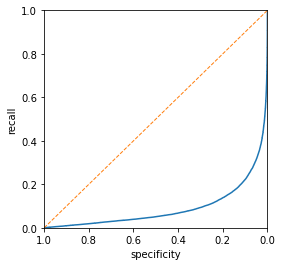

In [199]:
roc_df = pd.DataFrame({"recall": tpr, "specificity": 1-fpr})

ax = roc_df.plot(x="specificity", y="recall", figsize=(4,4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
ax.plot((1,0),(0,1), linestyle="dashed", linewidth=1)
ax.set_xlabel("specificity")
ax.set_ylabel("recall")

In [200]:
importance = logit_reg.coef_[0]
importance

array([-7.52064929e-03, -1.12752099e-04,  2.96117767e-01, -2.02366761e-01,
       -2.26960844e-01,  1.26208596e-01, -6.40324164e-02,  6.97523028e-01,
        8.68217927e-02,  2.14522544e-01,  3.12436284e-01,  2.30051071e-01,
        1.02952991e-01,  2.93717910e-01,  8.40446356e-02,  1.66840130e-01,
       -5.07067697e-03, -8.01887062e-01, -1.76111367e+00, -3.01889424e-01,
       -2.26111130e+00, -8.95268024e-01, -1.66773270e+00, -3.28358140e-01,
       -1.05632680e+00, -1.17831579e+00])

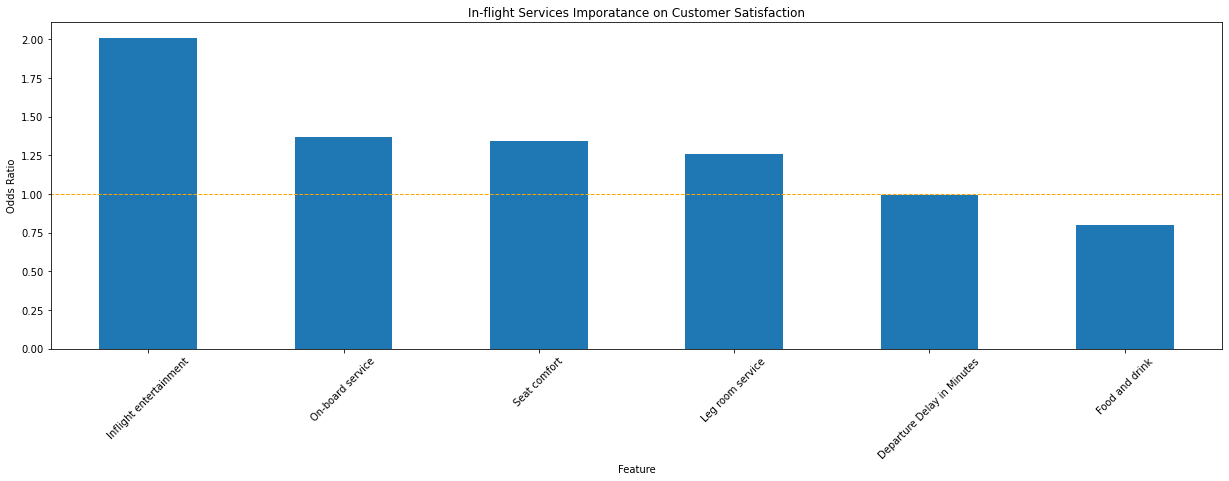

In [210]:
# Plotting the importance of each feature to help understand which contribute more to passenger satisfaction
importance_df = pd.DataFrame(
    importance,
    X_train.columns,
    columns=["Importance"],
)

# Convert the coefficients (in log scale) into odds ratio for better readability
importance_df = np.exp(importance_df)

flight_comfort = ["On-board service", "Inflight entertainment", "Leg room service", "Food and drink", "Seat comfort", "Departure Delay in Minutes"]

ax = importance_df.loc[flight_comfort].sort_values("Importance", ascending=False).plot(kind="bar", figsize=(21,6), title="In-flight Services Imporatance on Customer Satisfaction", legend=False, rot=45)
ax.set_ylabel("Odds Ratio")
ax.set_xlabel("Feature")
ax.plot((6,-1),(1,1), linewidth=1, linestyle="dashed", color="orange")